In [1]:
import os
import cv2
import pandas as pd
from collections import Counter

train_dir = 'data/training_set'
test_dir = 'data/test_set'

def get_image_sizes(directory):
    sizes = []
    for filename in os.listdir(directory):
        if 'Annotation' not in filename:
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path)
            
            h, w = img.shape[:2]
            sizes.append((w, h))
    return sizes

# Get sizes for training set
train_sizes = get_image_sizes(train_dir)
test_sizes = get_image_sizes(test_dir)

# Count unique sizes
train_size_counts = Counter(train_sizes)
test_size_counts = Counter(test_sizes)

In [2]:
print("---TRAINING SET IMAGE SIZES---")
print(f"Total images: {len(train_sizes)}")
print(f"Unique sizes: {len(train_size_counts)}")
print("\nSize (W x H) : Count")
for size, count in train_size_counts.items():
    print(f"  {size[0]} x {size[1]} : {count}")

---TRAINING SET IMAGE SIZES---
Total images: 999
Unique sizes: 21

Size (W x H) : Count
  800 x 540 : 975
  782 x 542 : 1
  790 x 539 : 1
  780 x 544 : 1
  800 x 542 : 5
  738 x 541 : 1
  788 x 545 : 1
  799 x 563 : 1
  798 x 541 : 1
  780 x 539 : 1
  796 x 542 : 1
  794 x 543 : 1
  791 x 544 : 1
  797 x 541 : 1
  783 x 541 : 1
  786 x 542 : 1
  796 x 544 : 1
  783 x 543 : 1
  789 x 545 : 1
  794 x 544 : 1
  789 x 540 : 1


In [3]:
print("---TEST SET IMAGE SIZES---")
print(f"Total images: {len(test_sizes)}")
print(f"Unique sizes: {len(test_size_counts)}")
print("\nSize (W x H) : Count")
for size, count in test_size_counts.items():
    print(f"  {size[0]} x {size[1]} : {count}")

---TEST SET IMAGE SIZES---
Total images: 335
Unique sizes: 9

Size (W x H) : Count
  800 x 540 : 327
  788 x 541 : 1
  800 x 543 : 1
  795 x 542 : 1
  786 x 544 : 1
  799 x 544 : 1
  784 x 545 : 1
  784 x 544 : 1
  782 x 541 : 1


In [4]:
!python model.py

Input shape: torch.Size([1, 1, 800, 540])
Output shape: torch.Size([1, 1, 800, 540])
Total parameters: 4,502,218


In [5]:
!python train.py

Using device: cuda
Training samples: 900, Validation samples: 99 - (10.0%)
Image size: (256, 256), Batch size: 4
Number of epochs: 100
----------------------------------------------------------------------------------------------------
Epoch 001  ||  train_loss 0.228762  train_dice 0.823147  train_iou 0.722533  ||  val_loss 0.119326  val_dice 0.919963  val_iou 0.853621  ||  *** Best model saved! ***
Epoch 002  ||  train_loss 0.100140  train_dice 0.933972  train_iou 0.879047  ||  val_loss 0.133034  val_dice 0.903939  val_iou 0.832445
Epoch 003  ||  train_loss 0.078697  train_dice 0.947856  train_iou 0.903830  ||  val_loss 0.075410  val_dice 0.948397  val_iou 0.903796  ||  *** Best model saved! ***
Epoch 004  ||  train_loss 0.066991  train_dice 0.956169  train_iou 0.917422  ||  val_loss 0.067961  val_dice 0.955108  val_iou 0.914790  ||  *** Best model saved! ***
Epoch 005  ||  train_loss 0.057472  train_dice 0.960912  train_iou 0.926653  ||  val_loss 0.070173  val_dice 0.955988  val_iou 

In [9]:
!python test.py

Using device: cuda
Loaded model from /home/zendragonxxx/mlmed2026/practice2/best_model.pth
Processed 50/335 images
Processed 100/335 images
Processed 150/335 images
Processed 200/335 images
Processed 250/335 images
Processed 300/335 images

Predicted masks and overlays saved to: /home/zendragonxxx/mlmed2026/practice2/predictions


In [ ]:
import json 
import matplotlib.pyplot as plt

with open("training_log.json", "r") as f:
    log = json.load(f)

epoch = [i['epoch'] for i in log]
train_loss = [i['train_loss'] for i in log]
val_loss = [i['val_loss'] for i in log]
train_dice = [i['train_dice'] for i in log]
val_dice = [i['val_dice'] for i in log]
train_iou = [i['train_iou'] for i in log]
val_iou = [i['val_iou'] for i in log]

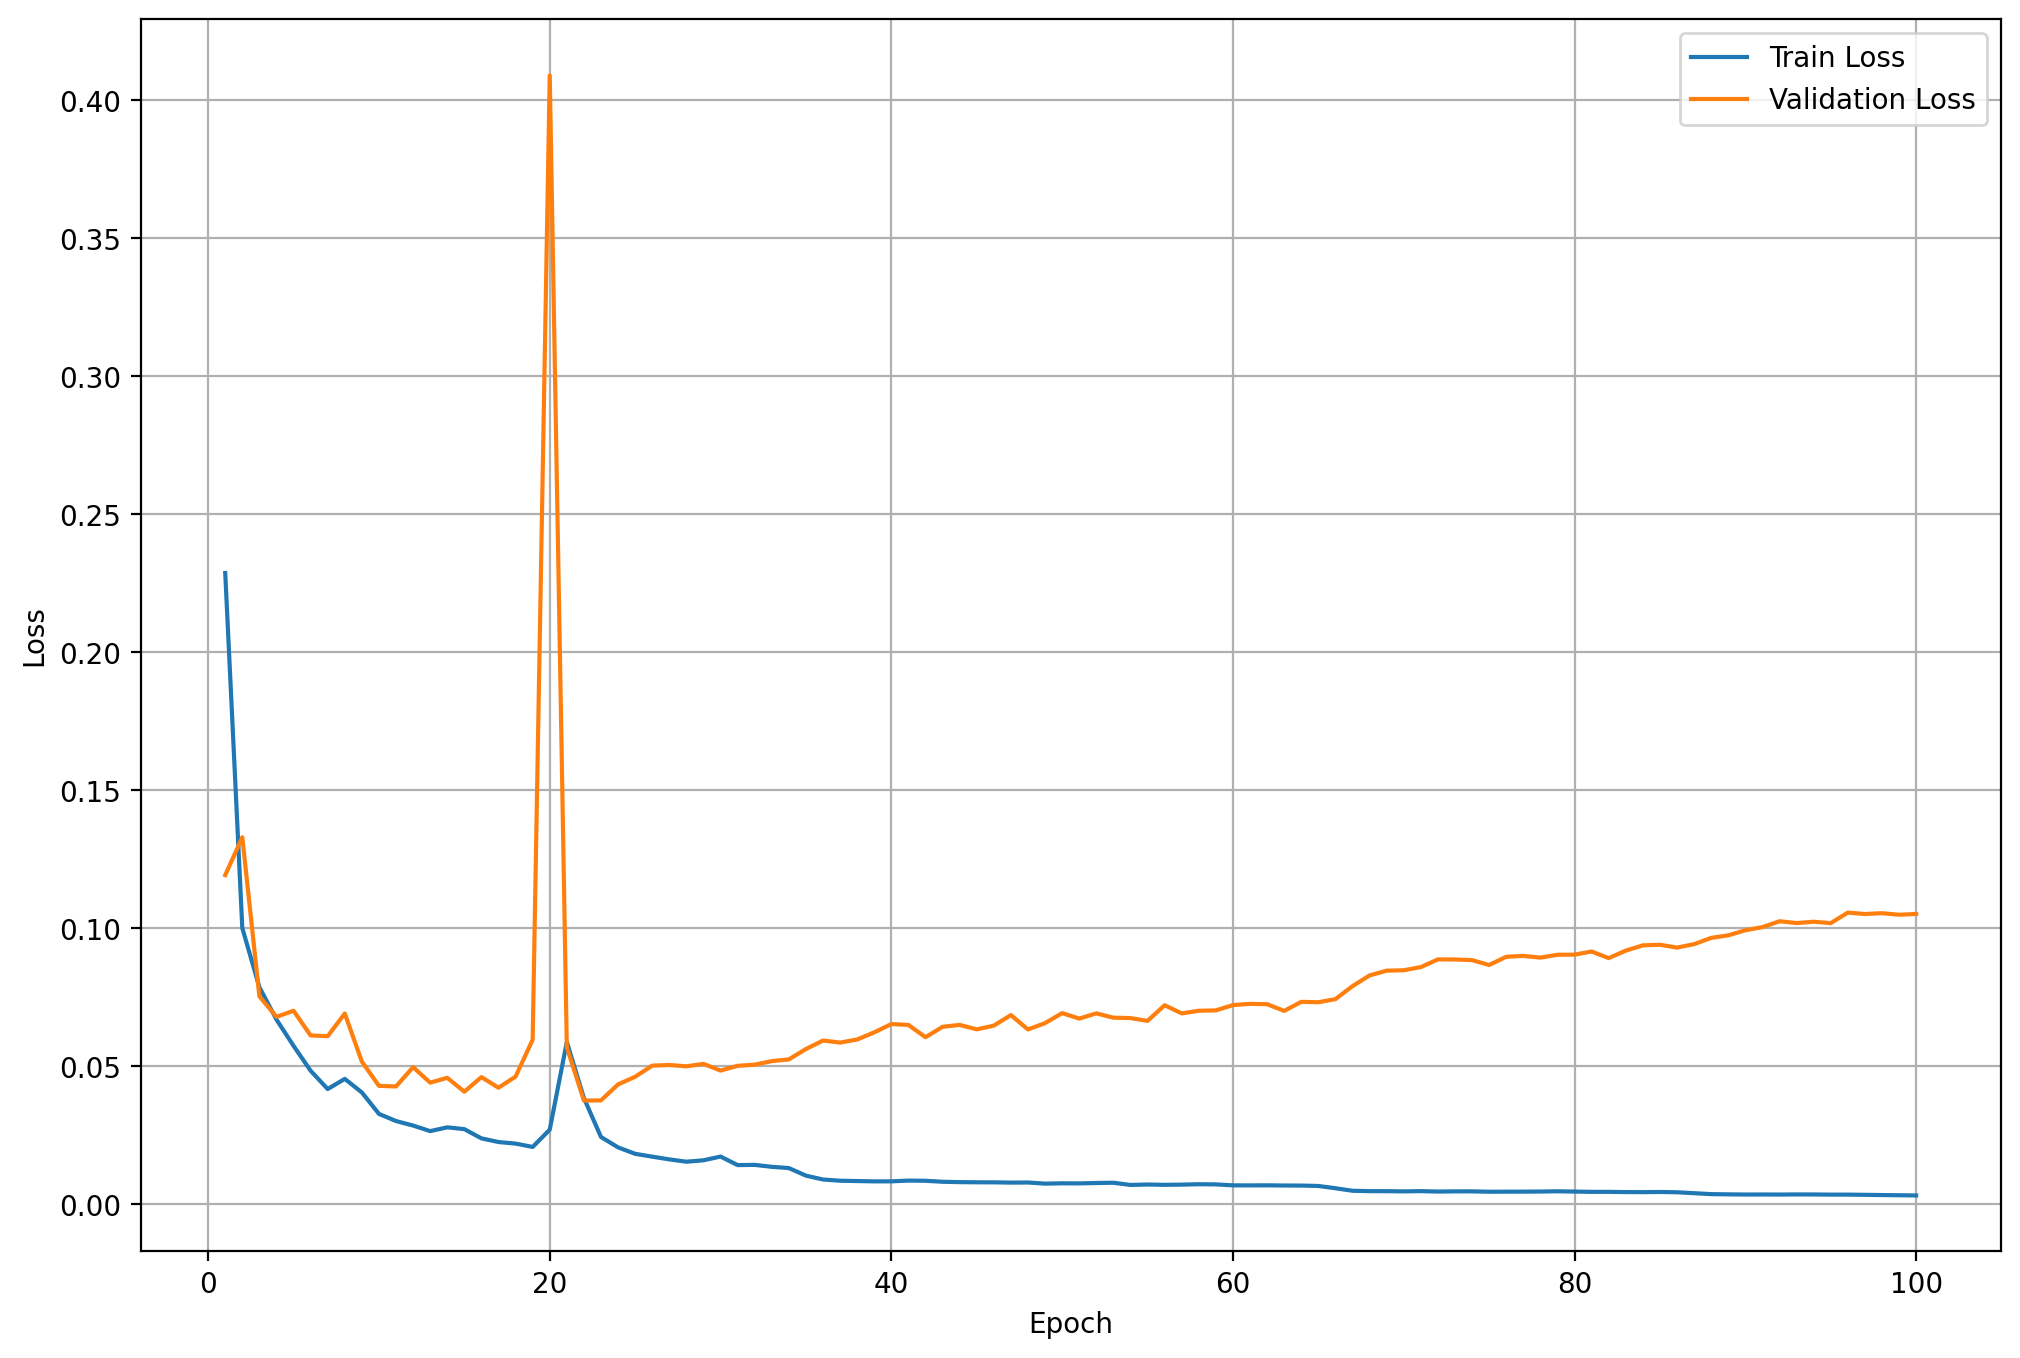

In [9]:
plt.figure(figsize=(12, 8), dpi=200)
plt.plot(epoch, train_loss, label='Train Loss')
plt.plot(epoch, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()

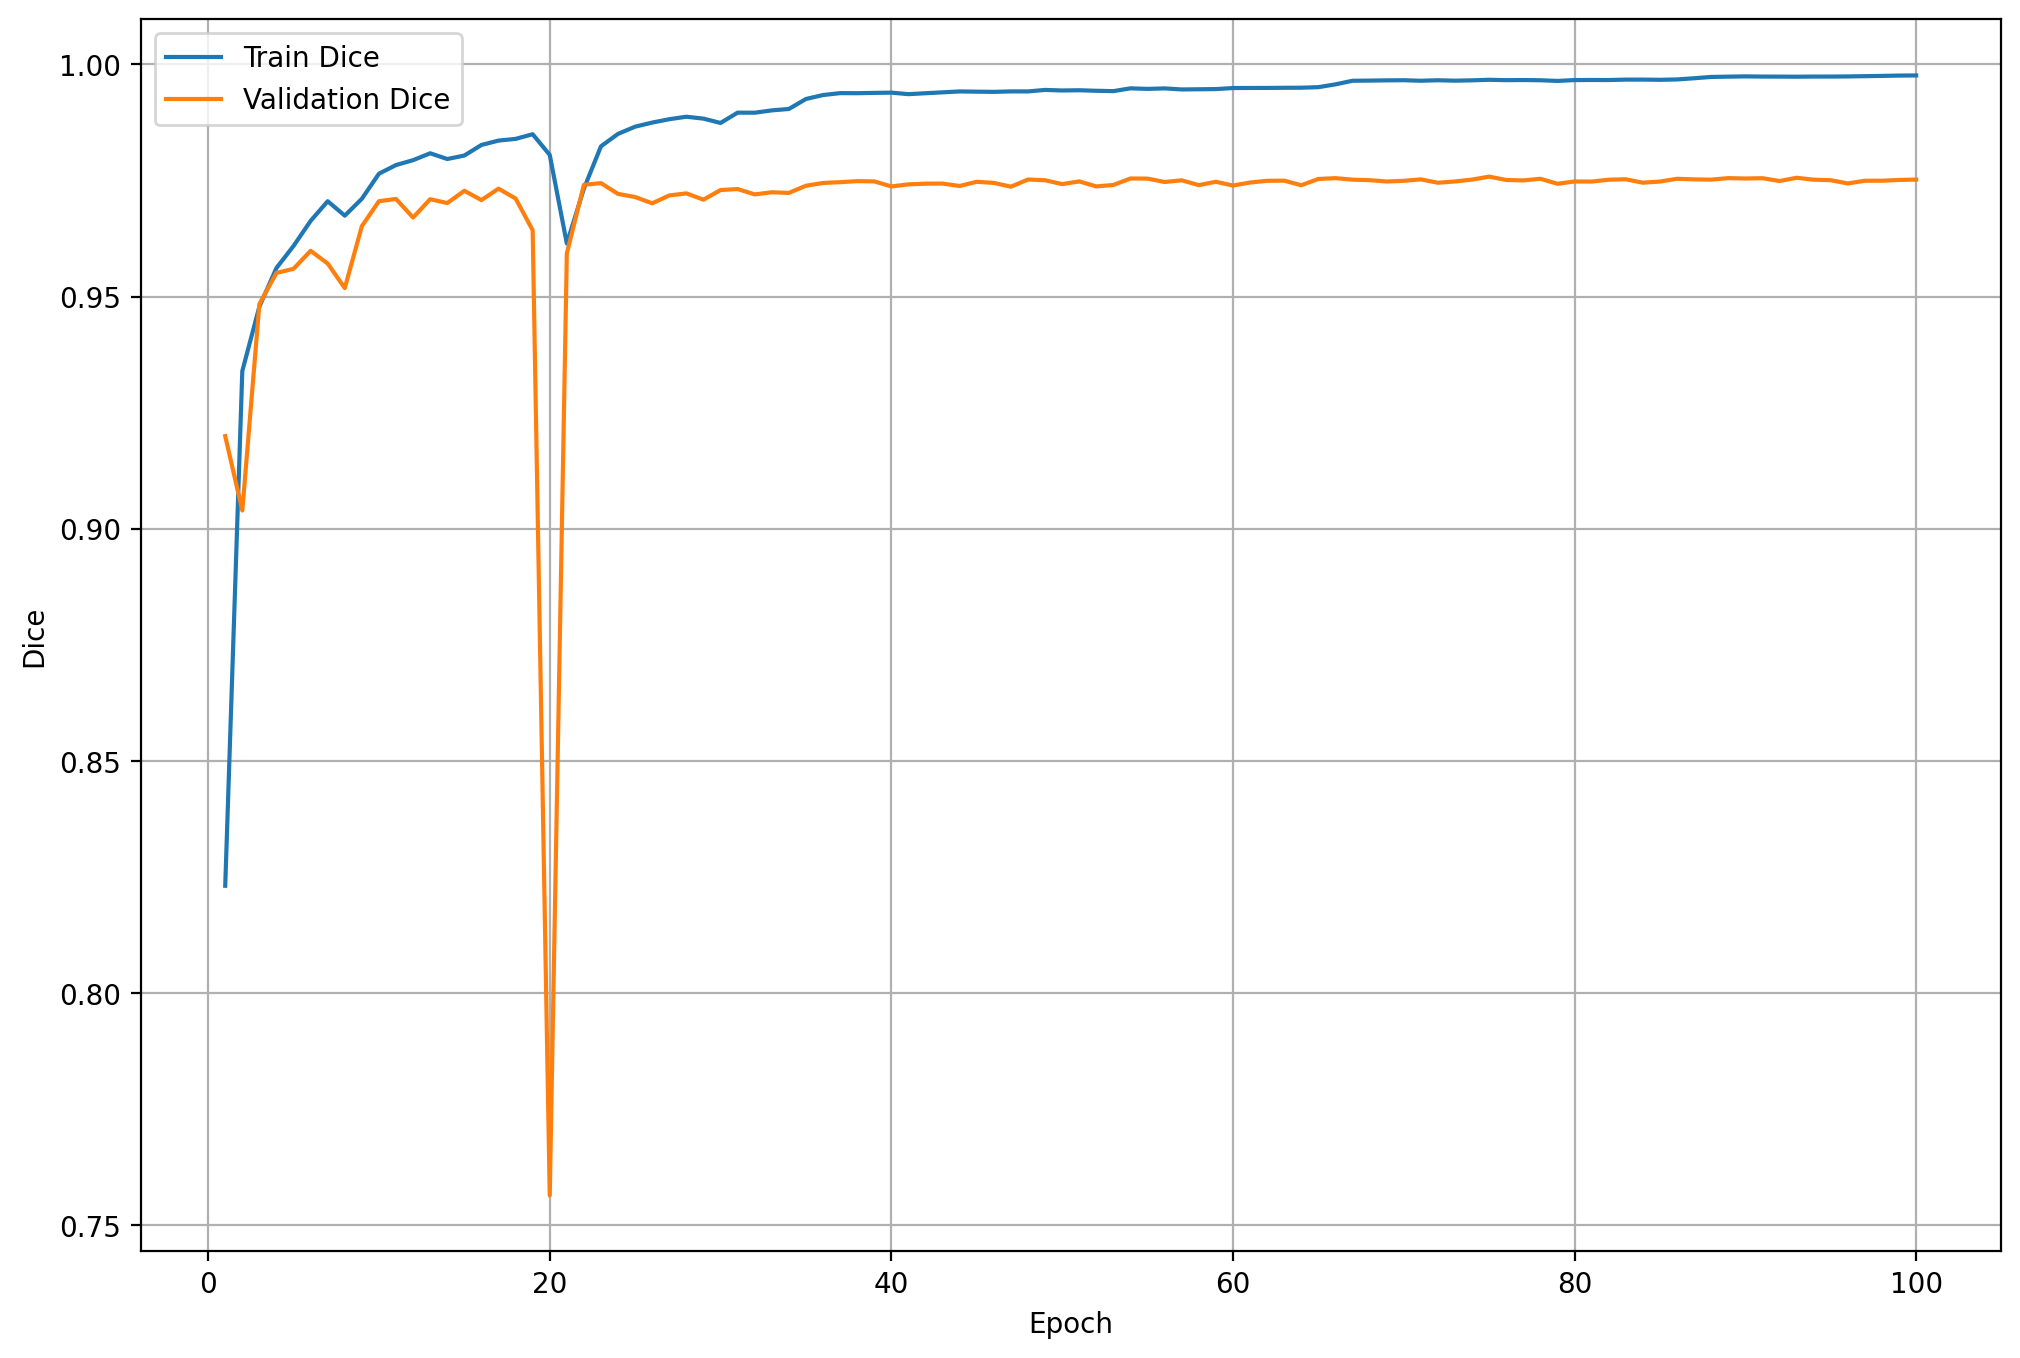

In [11]:
plt.figure(figsize=(12, 8), dpi=200)
plt.plot(epoch, train_dice, label='Train Dice')
plt.plot(epoch, val_dice, label='Validation Dice')
plt.xlabel('Epoch')
plt.ylabel('Dice')
plt.grid()
plt.legend()

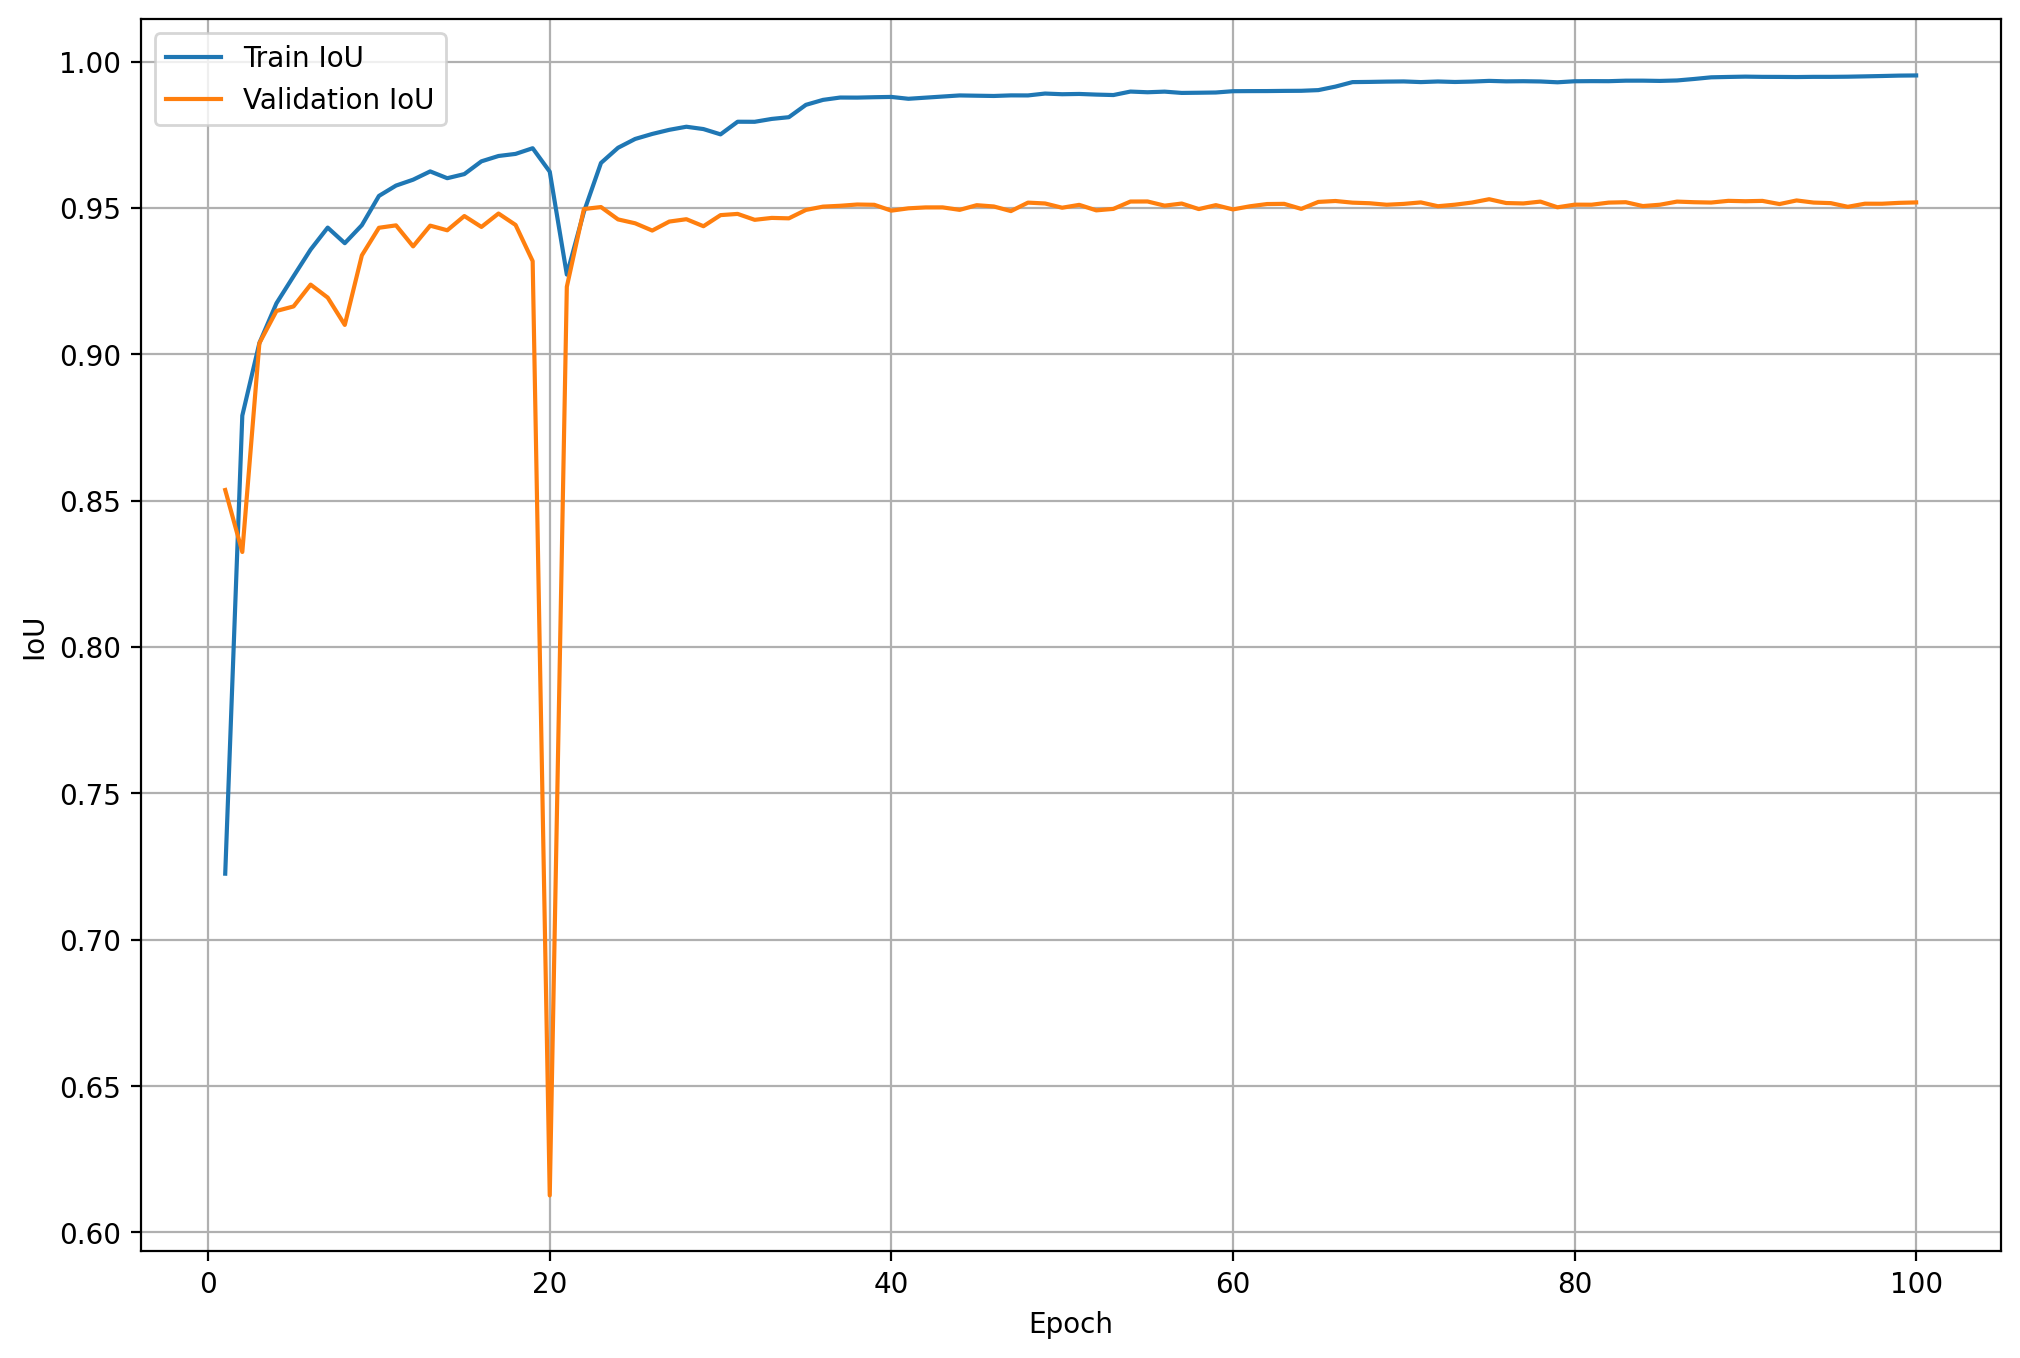

In [13]:
plt.figure(figsize=(12, 8), dpi=200)
plt.plot(epoch, train_iou, label='Train IoU')
plt.plot(epoch, val_iou, label='Validation IoU')
plt.xlabel('Epoch')
plt.ylabel('IoU')
plt.grid()
plt.legend()

In [19]:
# Lowest val_loss
lowest_val_loss = min(log, key=lambda x: x['val_loss'])
print(lowest_val_loss)

{'epoch': 22, 'train_loss': 0.038570019337866045, 'train_dice': 0.9732556687461005, 'train_iou': 0.9486591657002766, 'val_loss': 0.037630183920264244, 'val_dice': 0.9740805459022522, 'val_iou': 0.9496202659606934}


In [18]:
# Highest val_iou
highest_val_iou = max(log, key=lambda x: x['val_iou'])
print(highest_val_iou)

{'epoch': 75, 'train_loss': 0.004611511412594053, 'train_dice': 0.9966886907153659, 'train_iou': 0.9934007989035712, 'val_loss': 0.08675451740622521, 'val_dice': 0.9758362770080566, 'val_iou': 0.9529713773727417}


In [20]:
# Highest val_dice
highest_val_dice = max(log, key=lambda x: x['val_dice'])
print(highest_val_dice)

{'epoch': 75, 'train_loss': 0.004611511412594053, 'train_dice': 0.9966886907153659, 'train_iou': 0.9934007989035712, 'val_loss': 0.08675451740622521, 'val_dice': 0.9758362770080566, 'val_iou': 0.9529713773727417}
